In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import torchvision
from tqdm.notebook import tqdm
import os
import sys

# Custom Imports

In [2]:
os.chdir("../fashion_ml")

In [3]:
from cnn_autoencoder import AutoEncoder
from data_loader import EZ_Dataloader
from experiment import FashionML

# Load data

In [4]:
dl = EZ_Dataloader("FashionMNIST")
dl.build_train_test_loader()
dl.build_val_loader()

# Build AE

In [5]:
t = dl.train_loader.dataset

torch.Size([1, 28, 28])


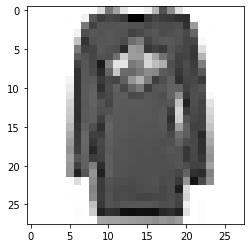

In [6]:
import matplotlib.pyplot as plt
a = t[12342][0]
print(a.shape)
plt.imshow(torch.squeeze(a), cmap = "Greys")

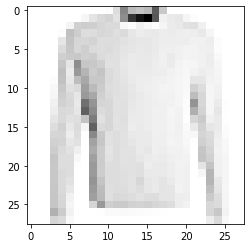

In [7]:
import matplotlib.pyplot as plt
b = t[999][0]
plt.imshow(torch.squeeze(b), cmap = "Greys")

In [8]:
fae = AutoEncoder(hdims=[32,32,64], latent_dim=2)

In [9]:
fae

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=2, bias=True)
    (8): Sigmoid()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=3136, bias=True)
    (1): Unflatten(dim=1, unflattened_size=(64, 7, 7))
    (2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (7): Sigmoid()
  )
)

In [10]:
res = fae.forward(torch.unsqueeze(a,0))

In [11]:
res.shape

torch.Size([1, 1, 28, 28])

# Train the AE

In [52]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs = 20
model = AutoEncoder(hdims=[32,32,64], latent_dim=2)

In [53]:
for epoch in tqdm(range(epochs)):
    running_loss = 0
    for i, data in enumerate(dl.train_loader, 0):
        batch, labels = data
        batch_size = batch.shape[0]
        
        optimizer.zero_grad()
        x_prime = model.forward(batch)
        
        loss = ((x_prime-batch)**2).mean(axis=[-1,-2]).mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.detach()
        
    running_loss = running_loss / (i+1)
        
    val_loss = 0
    with torch.no_grad():
        for i, data in enumerate(dl.val_loader):
            batch, labels = data 
            batch_size = batch.shape[0]
            
            x_prime = model.forward(batch)
            loss = ((x_prime-batch)**2).mean(axis=[-1,-2]).mean()
            
            val_loss += loss.detach()
    
    val_loss = val_loss / (i+1)
    
    print("Epoch: %d, Train loss: %.02f, Val loss: %.02f" % (epoch, running_loss, val_loss))

Epoch: 0, Train loss: 0.17, Val loss: 0.17
Epoch: 1, Train loss: 0.17, Val loss: 0.17
Epoch: 2, Train loss: 0.17, Val loss: 0.17
Epoch: 3, Train loss: 0.17, Val loss: 0.17
Epoch: 4, Train loss: 0.17, Val loss: 0.17
Epoch: 5, Train loss: 0.17, Val loss: 0.17
Epoch: 6, Train loss: 0.17, Val loss: 0.17
Epoch: 7, Train loss: 0.17, Val loss: 0.17
Epoch: 8, Train loss: 0.17, Val loss: 0.17
Epoch: 9, Train loss: 0.17, Val loss: 0.17
Epoch: 10, Train loss: 0.17, Val loss: 0.17
Epoch: 11, Train loss: 0.17, Val loss: 0.17
Epoch: 12, Train loss: 0.17, Val loss: 0.17
Epoch: 13, Train loss: 0.17, Val loss: 0.17
Epoch: 14, Train loss: 0.17, Val loss: 0.17
Epoch: 15, Train loss: 0.17, Val loss: 0.17
Epoch: 16, Train loss: 0.17, Val loss: 0.17
Epoch: 17, Train loss: 0.17, Val loss: 0.17
Epoch: 18, Train loss: 0.17, Val loss: 0.17
Epoch: 19, Train loss: 0.17, Val loss: 0.17



In [55]:
torch.save(model.state_dict(), "../models/20_epoch_AE_model.pt")

In [57]:
rand_latent = torch.randn((1, 2))
t = model.decoder(rand_latent)

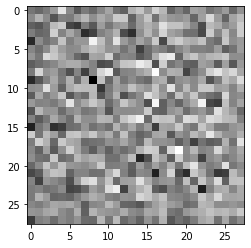

In [58]:
plt.imshow(torch.squeeze(t.detach().cpu()), cmap = "Greys")

In [60]:
img = []
for i in range(20):
    i1 = (i-10)/2
    row = []
    for j in range(20):
        i2 = (j-10)/2
        
        sample = model.decoder(torch.tensor((i1,i2))).detach()
        row.append(torch.squeeze(sample))
    
    img.append(torch.cat(row, axis = 1))

img = torch.cat(img, axis = 0)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)